In [7]:
import pandas as pd

df = pd.read_excel("pakdasht_tehran.xlsx")

df.head

df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

C:\Users\asus\AppData\Local\Temp\ipykernel_18160\549241858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['Unnamed: 5'] = pd.to_numeric(df_head['Unnamed: 5'], errors='coerce')


<function matplotlib.pyplot.show(close=None, block=None)>

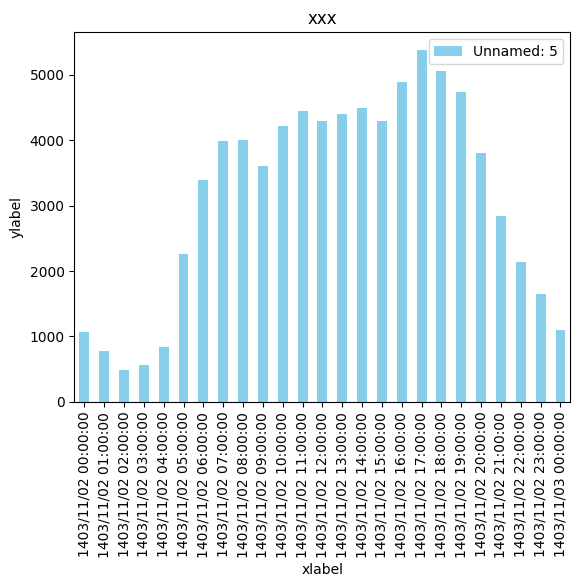

In [13]:
import matplotlib.pyplot as plt

df_head = df.iloc[14:39]

df_head['Unnamed: 5'] = pd.to_numeric(df_head['Unnamed: 5'], errors='coerce')

df_head.plot(x ='Unnamed: 2', y='Unnamed: 5', kind="bar", color='skyblue')

plt.title('xxx')
plt.xlabel('xlabel')
plt.ylabel('ylabel')

plt.show

In [24]:
import jdatetime

df_1 = df[1:].copy()  # کپی برای جلوگیری از تغییر مستقیم در دیتافریم اصلی

def convert_shamsi_to_gregorian(shamsi_datetime):
    # جدا کردن تاریخ و ساعت
    date_part, time_part = shamsi_datetime.split(' ')
    
    # تبدیل تاریخ (شمسی به میلادی)
    year, month, day = map(int, date_part.split('/'))
    gregorian_date = jdatetime.date(year, month, day).togregorian()
    
    # تبدیل ساعت
    hour, minute, second = map(int, time_part.split(':'))
    
    # ترکیب تاریخ میلادی با ساعت و دقیقه و ثانیه
    return pd.Timestamp(gregorian_date.year, gregorian_date.month, gregorian_date.day, hour, minute, second)

# اعمال تبدیل روی دیتافریم
df_1['Unnamed: 2'] = df_1['Unnamed: 2'].apply(convert_shamsi_to_gregorian)

# تبدیل تاریخ مورد نظر (1403/11/03) از شمسی به میلادی
shamsi_target_date = jdatetime.date(1403, 11, 3).togregorian()
target_date = pd.Timestamp(shamsi_target_date)

# فیلتر داده‌ها بر اساس تاریخ و ساعت بین 5 تا 8
df_filtered = df_1[
    (df_1['Unnamed: 2'].dt.date == target_date.date()) &  # بررسی تاریخ
    (df_1['Unnamed: 2'].dt.hour >= 5) &                  # ساعت >= 5
    (df_1['Unnamed: 2'].dt.hour < 8)                     # ساعت < 8
]

# نمایش خروجی
print(df_filtered['Unnamed: 2'])



43   2025-01-22 05:00:00
44   2025-01-22 06:00:00
45   2025-01-22 07:00:00
Name: Unnamed: 2, dtype: datetime64[ns]


In [ ]:
df_1 = df[1:].copy() 

def convert_shamsi_to_gregorian(shamsi_datetime):
  
    date_part, time_part = shamsi_datetime.split(' ')
    
    # تبدیل تاریخ (شمسی به میلادی)
    year, month, day = map(int, date_part.split('/'))
    gregorian_date = jdatetime.date(year, month, day).togregorian()
    
    # تبدیل ساعت
    hour, minute, second = map(int, time_part.split(':'))
    
    # ترکیب تاریخ میلادی با ساعت و دقیقه و ثانیه
    return pd.Timestamp(gregorian_date.year, gregorian_date.month, gregorian_date.day, hour, minute, second)

# تبدیل ستون تاریخ و زمان از شمسی به میلادی
df_1['Unnamed: 2'] = df_1['Unnamed: 2'].apply(convert_shamsi_to_gregorian)

# فیلتر کردن داده‌های بین ساعت ۵ تا ۸
df_filtered = df_1[
    (df_1['Unnamed: 2'].dt.hour >= 5) &
    (df_1['Unnamed: 2'].dt.hour < 8)
]

# ایجاد یک ستون جدید برای تاریخ (بدون ساعت) برای گروه‌بندی
df_filtered['date_only'] = df_filtered['Unnamed: 2'].dt.date

# جمع زدن مقدار ستون ۵ بر اساس تاریخ
result = df_filtered.groupby('date_only')['Unnamed: 5'].sum().reset_index()

# نمایش خروجی
print(result)

     date_only  Unnamed: 5
0   2025-01-20      6090.0
1   2025-01-21      9633.0
2   2025-01-22      9640.0
3   2025-01-23      8268.0
4   2025-01-24      3999.0
5   2025-01-25     10006.0
6   2025-01-26      9814.0
7   2025-01-27      5473.0
8   2025-01-28      4950.0
9   2025-01-29      9436.0
10  2025-01-30      7842.0
11  2025-01-31      4061.0
12  2025-02-01      9809.0
13  2025-02-02      9520.0
14  2025-02-03      9559.0
15  2025-02-12      8286.0
16  2025-02-13      7695.0
17  2025-02-14      3784.0
18  2025-02-15      9945.0
19  2025-02-16      9752.0
20  2025-02-17      5824.0
21  2025-02-18      9721.0


C:\Users\asus\AppData\Local\Temp\ipykernel_18160\3338609386.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_only'] = df_filtered['Unnamed: 2'].dt.date


<function matplotlib.pyplot.show(close=None, block=None)>

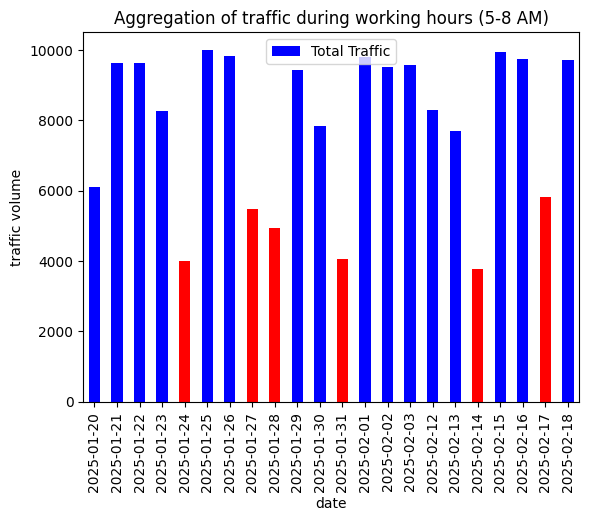

In [29]:
# df_head['Unnamed: 5'] = pd.to_numeric(df_head['Unnamed: 5'], errors='coerce')
colors = ['red' if value < 6000 else 'blue' for value in result['Unnamed: 5']]

result.rename(columns={'Unnamed: 5': 'Total Traffic'}, inplace=True)

result.plot(x ='date_only', y='Total Traffic', kind="bar", color=colors)

plt.title('Aggregation of traffic during working hours (5-8 AM)')
plt.xlabel('date')
plt.ylabel('traffic volume')

plt.show